In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from retrieval_base.model_components.chemistry import FastChemistry

In [ ]:
pressure = 10**np.linspace(-5,2,70)
# temperature = np.linspace(200,2000,70)
temperature = np.linspace(400,500,70)
print(pressure)
FC = FastChemistry(
    line_species=['12C-16O__HITEMP'], pressure=pressure, 
    abundance_file='/net/lem/data1/regt/fastchem/input/element_abundances/asplund_2020_simplified.dat', 
    gas_data_file='/net/lem/data1/regt/fastchem/input/logK/logK_simplified.dat', 
    cond_data_file='/net/lem/data1/regt/fastchem/input/logK/logK_condensates_simplified.dat', 
    use_rainout_cond=True, 
    min_temperature=200.,
)
FC({}, temperature)

In [ ]:
def get_cloud_base(self, cond_species):
    """Get the cloud base pressure for a given condensate species."""
    idx = self.fastchem.getCondSpeciesIndex(cond_species)
    n_cond = np.array(self.output.number_densities_cond)[:,idx]

    is_cond = (n_cond > 0)

    if is_cond.sum() == 0:
        # Not condensed, return TOA
        return self.pressure.min()
    if (is_cond.sum() == 1) or is_cond.all():
        # Condensed below modeled atmosphere
        return self.pressure.max()
    
    return self.pressure[is_cond][0]

FC({}, np.linspace(500,2400,70))
get_cloud_base(FC, 'Fe(s,l)'), get_cloud_base(FC, 'Mg2SiO4(s,l)'), get_cloud_base(FC, 'MgSiO3(s,l)')

In [ ]:
FC.fastchem.getCondSpeciesIndex('Fe(s,l)'), FC.fastchem.getCondSpeciesIndex('Mg2SiO4(s,l)')

In [ ]:
np.array(FC.output.number_densities_cond)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import copy

import result_utils

In [8]:
c_d = 'k'; lw_d = 0.8
c_m = 'C1'; lw_m = 0.8

res_alpha = 0.85

# path = '/net/schenk/data2/regt/data_backup/JWST_VHS_1256B/retrieval_outputs'
# Res = result_utils.RetrievalResults(f'{path}/g140h_nrs12_eqchem_ret_2/test_')
# Res = result_utils.RetrievalResults(f'{path}/g235h_nrs12_eqchem_ret_1/test_')
# Res = result_utils.RetrievalResults(f'{path}/all_gratings_eqchem_ret_1/test_')
# Res = result_utils.RetrievalResults(f'{path}/all_gratings_freechem_ret_1/test_')
# path = '/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_7/test_'
path = '/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_6/test_'
Res = result_utils.RetrievalResults(path)

# Res.load_components(['d_spec', 'LogLike', 'm_spec_broad'])
# m_spec_complete = copy.deepcopy(Res.m_spec_broad)

/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_6/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_6/test_.txt


In [9]:
Res._load_initial_components()
Res._load_evaluation_components()
Res.elapsed_times = []

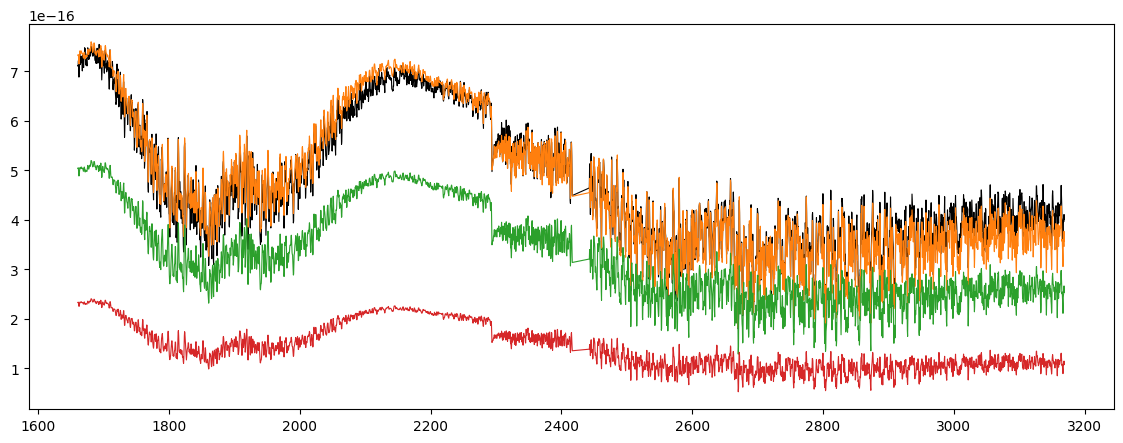

In [10]:
Res._evaluate_sample(Res.bestfit_parameters, evaluation=False)

fig, ax = plt.subplots(figsize=(14,5))

d_wave = Res.d_spec['nirspec_g235h_12_A'].wave.flatten()
d_flux = Res.d_spec['nirspec_g235h_12_A'].flux.flatten()

m_flux = Res.LogLike.m_flux_phi[0].flatten()
m_flux_A = Res.m_spec_broad['nirspec_g235h_12_A'].flux_binned.flatten()
m_flux_B = Res.m_spec_broad['nirspec_g235h_12_B'].flux_binned.flatten()

ax.plot(d_wave, d_flux, c=c_d, lw=lw_d, label='Data')
ax.plot(d_wave, m_flux, c=c_m, lw=lw_m, label='Model')
ax.plot(d_wave, m_flux_A, c='C2', lw=lw_m, label='A')
ax.plot(d_wave, m_flux_B, c='C3', lw=lw_m, label='B')
plt.show()

In [ ]:
from petitRADTRANS.chemistry import clouds

P_base = clouds.simple_cdf(
    name='MgSiO3(s)_amorphous__Mie', 
    press=Res.Cloud['nirspec_g235h_12_A'].pressure, 
    temp=Res.PT['nirspec_g235h_12_A'].temperature, 
            metallicity=Res.Chem['nirspec_g235h_12_A'].FeH, co_ratio=Res.Chem['nirspec_g235h_12_A'].CO, 
            mmw=np.nanmean(Res.Chem['nirspec_g235h_12_A'].mass_fractions['MMW']), 
            )

In [18]:
Res.Cloud['nirspec_g235h_12_A']._get_cloud_base(
    Res.Chem['nirspec_g235h_12_A'], Res.PT['nirspec_g235h_12_A'], 
    species='Mg2SiO4(s)_amorphous__Mie', 
    )

(89.58409579631508, 0.004659291903721675)

In [22]:
Res.Chem['nirspec_g235h_12_A'].CO, Res.Chem['nirspec_g235h_12_A'].FeH

(0.6502348899803762, 0.3616398722266432)

In [ ]:
params = Res.bestfit_parameters.copy()
# params[24] = 0.8
params[29] = 0.5
params[30] = -1.0
params[31] = 1.0
params[32] = 0.0

Res._evaluate_sample(params, evaluation=False)

fig, (ax, ax_res) = plt.subplots(figsize=(14,7), nrows=2, sharex=True, gridspec_kw={'height_ratios':[3,1]})

d_wave = Res.d_spec['nirspec_g235h_12_A'].wave.flatten()
d_flux = Res.d_spec['nirspec_g235h_12_A'].flux.flatten()

m_flux = Res.LogLike.m_flux_phi[0].flatten()
m_flux_A = Res.m_spec_broad['nirspec_g235h_12_A'].flux_binned.flatten()
m_flux_B = Res.m_spec_broad['nirspec_g235h_12_B'].flux_binned.flatten()

ax.plot(d_wave, d_flux, c=c_d, lw=lw_d, label='Data')
ax.plot(d_wave, m_flux, c=c_m, lw=lw_m, label='Model')
ax.plot(d_wave, m_flux_A, c='C2', lw=lw_m, label='A')
ax.plot(d_wave, m_flux_B, c='C3', lw=lw_m, label='B')

ax_res.plot(d_wave, d_flux/m_flux, c='C4', lw=lw_m, label='Residuals')
# ax_res.axhline(0, ls='--', c='k', lw=0.8)
plt.show()

In [ ]:
Res.ParamTable.table

,name,m_set,Param,val,idx_free
0,parallax,all,None,47.2733,None
1,epsilon_limb,all,None,0.6,None
2,distance,all,None,21.15359,None
3,b,all,<retrieval_base.parameters.Parameter object at...,0.575388,0
4,a,all,<retrieval_base.parameters.Parameter object at...,1.806524,1
...,...,...,...,...,...
60,P_base_Fe(s)_amorphous__Mie,nirspec_g235h_12_B,None,22.462847,None
61,log_X_base_Fe(s)_amorphous__Mie,nirspec_g235h_12_B,<retrieval_base.parameters.Parameter object at...,-10.261512,39
62,X_base_Fe(s)_amorphous__Mie,nirspec_g235h_12_B,None,0.0,None
63,f_sed_Fe(s)_amorphous__Mie,nirspec_g235h_12_B,<retrieval_base.parameters.Parameter object at...,5.880952,40


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

d_wave = Res.d_spec['nirspec_g235h_12_A'].wave.flatten()
d_flux = Res.d_spec['nirspec_g235h_12_A'].flux.flatten()

m_flux = Res.LogLike.m_flux_phi[0].flatten()
m_flux_A = Res.m_spec_broad['nirspec_g235h_12_A'].flux_binned.flatten()
m_flux_B = Res.m_spec_broad['nirspec_g235h_12_B'].flux_binned.flatten()

ax.plot(d_wave, d_flux, c=c_d, lw=lw_d, label='Data')
ax.plot(d_wave, m_flux, c=c_m, lw=lw_m, label='Model')
ax.plot(d_wave, m_flux_A, c='C2', lw=lw_m, label='A')
ax.plot(d_wave, m_flux_B, c='C3', lw=lw_m, label='B')
plt.show()

In [ ]:
Res.get_model_spectrum()

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

d_wave = Res.d_spec['nirspec_g235h_12_A'].wave.flatten()
d_flux = Res.d_spec['nirspec_g235h_12_A'].flux.flatten()

m_flux_A = Res.m_spec_broad['nirspec_g235h_12_A'].flux_binned.flatten()
m_flux_B = Res.m_spec_broad['nirspec_g235h_12_B'].flux_binned.flatten()

ax.plot(d_wave, d_flux, c=c_d, lw=lw_d, label='Data')
ax.plot(d_wave, m_flux_A, c='C1', lw=lw_m, label='A')
ax.plot(d_wave, m_flux_B, c='C2', lw=lw_m, label='B')
plt.show()

In [ ]:
Res.d_spec.keys()

In [ ]:
wave_range = None
# wave_range = (1650,1900)
# wave_range = (2850,3200)
height_ratios = [0.85,0.15]

c_d = 'k'; lw_d = 1.4
c_m = 'k'; lw_m = 1
res_alpha = 0.8

fig = plt.figure(figsize=(14,5))
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.15, wspace=0, height_ratios=height_ratios)
ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])])

for i, (m_set, d_spec_i) in enumerate(Res.d_spec.items()):

    if 'g140h' in m_set:
        continue
    if 'g235h' in m_set:
        continue
    # if 'g395h' in m_set:
    #     continue

    c_d = plt.get_cmap('tab20')(i/20)
    ax[0].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten(), c=c_d, lw=lw_d)
    ax[0].plot(d_spec_i.wave.flatten(), Res.LogLike.m_flux_phi[i].flatten(), c=c_m, lw=lw_m, alpha=res_alpha, zorder=20)

    ax[1].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten() - Res.LogLike.m_flux_phi[i].flatten(), c=c_d, lw=lw_d)
    # ax[1].plot(d_spec_i.wave.flatten(), (d_spec_i.flux.flatten() - Res.LogLike.m_flux_phi[i].flatten())/Res.LogLike.m_flux_phi[i].flatten(), c=c_d, lw=lw_d)
    ax[1].plot(d_spec_i.wave.flatten(), 0*d_spec_i.wave.flatten(), c=c_m, lw=lw_m)

ax[0].set(ylabel=r'Flux ($\mathrm{W\ m^{-2}\ \mu m^{-1}}$)', xticklabels=[], xlim=wave_range)

ylim = np.array(list(ax[0].get_ylim()))
ylim = 1/2*np.array([-1,1]) * np.diff(ylim)*height_ratios[1]/height_ratios[0]
# ylim = (-0.15,0.15)
ax[1].set(xlabel=r'Wavelength (nm)', ylabel=r'Residuals', xlim=wave_range, ylim=ylim)
plt.show()

In [ ]:
# line_species = '1H2-16O__POKAZATEL'
# line_species = '12C-16O__HITEMP'
# line_species = '13C-16O__HITEMP'
# line_species = '12C-18O__HITEMP'
# line_species = '1H2-32S__AYT2'
# line_species = '1H-19F__Coxon-Hajig'
# line_species = '12C-1H4__MM'
# line_species = '39K__Kurucz'
# line_species = '23Na__Kurucz'
# line_species = '56Fe__Kurucz'
# line_species = '56Fe-1H__MoLLIST'
# line_species = '52Cr-1H__MoLLIST'
# line_species = '51V-16O__HyVO'
# line_species = '48Ti-16O__Toto'
# line_species = '40Ca__Kurucz'
# line_species = '1H-12C-14N__Harris'
# line_species = '14N-1H3__CoYuTe'
# line_species = '52Cr__Kurucz'
# line_species = '12C-16O2__HITEMP'
# line_species = '16O-1H__MYTHOS'
# line_species = '1H-35Cl__HITRAN-HCl'
line_species = '28Si-16O__SiOUVenIR'

# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_1')
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_2', reload_m_spec=False)
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_1')
# Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_2', reload_m_spec=False)

Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_1')
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g140h_2', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_1', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g235h_2', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g395h_1', reload_m_spec=False)
Res.get_model_spectrum(line_species_to_exclude=[line_species], m_set='nirspec_g395h_2', reload_m_spec=False)
m_spec_wo_species = copy.deepcopy(Res.m_spec_broad)

In [ ]:
def plot_spectrum(wave_range=None):
    fig = plt.figure(figsize=(14,5))
    gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.8,(0.2)])
    ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])])

    for i, (m_set, d_spec_i) in enumerate(Res.d_spec.items()):
        ax[0].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten(), c=c_d, lw=lw_d)
        ax[0].plot(d_spec_i.wave.flatten(), Res.LogLike.m_flux_phi[i].flatten(), c=c_m, lw=lw_m)

        ax[1].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten() - Res.LogLike.m_flux_phi[i].flatten(), c=c_d, lw=lw_d)
        ax[1].plot(d_spec_i.wave.flatten(), 0*d_spec_i.wave.flatten(), c=c_m, lw=lw_m)

        # ax[0].plot(d_spec_i.wave.flatten(), Res.m_spec_broad[m_set].flux_binned.flatten(), c='r')
        # ax[0].plot(d_spec_i.wave.flatten(), m_spec_wo_species[m_set].flux_binned.flatten(), c='r', lw=lw_m)
        # ax[1].plot(d_spec_i.wave.flatten(), d_spec_i.flux.flatten() - m_spec_wo_species[m_set].flux_binned.flatten(), c='r', lw=lw_m)
        # ax[1].fill_between(
        #     d_spec_i.wave.flatten(), m_spec_complete[m_set].flux_binned.flatten() - m_spec_wo_species[m_set].flux_binned.flatten(), 0*d_spec_i.wave.flatten(), 
        #     fc='C0', zorder=30, ec='none', 
        # )
        
        kwargs = dict(fc='C0', zorder=-1, ec='none', alpha=res_alpha)
        ax[0].fill_between(
            d_spec_i.wave.flatten(), m_spec_complete[m_set].flux_binned.flatten(), 
            m_spec_wo_species[m_set].flux_binned.flatten(), **kwargs
            )
        ax[1].fill_between(
            d_spec_i.wave.flatten(), (d_spec_i.flux.flatten() - m_spec_wo_species[m_set].flux_binned.flatten()), 
            (d_spec_i.flux.flatten() - m_spec_complete[m_set].flux_binned.flatten()), **kwargs
            )
        
        res = m_spec_wo_species[m_set].flux_binned.flatten() - m_spec_complete[m_set].flux_binned.flatten()
        res = res/m_spec_complete[m_set].flux_binned.flatten()
        idx = np.argmax(res)
        print(f'{np.max(res)*100:.6f} % | {d_spec_i.wave.flatten()[idx]:.1f} nm')


    ax[0].set(ylabel=r'Flux ($\mathrm{W\ m^{-2}\ \mu m^{-1}}$)', xticklabels=[], xlim=wave_range)
    ax[1].set(xlabel=r'Wavelength (nm)', ylabel=r'Residuals', xlim=wave_range)
    plt.show()

plot_spectrum()
# for xmin in np.arange(950, 1900, 150):
#     plot_spectrum([xmin, xmin+150])
# for xmin in np.arange(1600, 3200, 150):
#     plot_spectrum([xmin, xmin+150])

In [ ]:
Res.load_components(['Chem'])

In [ ]:
Res.Chem['nirspec_g140h_1'].quench_settings